In [1]:
### Importing the libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rnd
%matplotlib inline

from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_df = pd.read_csv('.../train.csv')
test_df = pd.read_csv('.../test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_df.isnull().any())
print('-'*40)
print(test_df.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
----------------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Let us look at the categorical features

train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barkworth, Mr. Algernon Henry Wilson",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


Assumptions and decisions taken before modelling

- Age and Embarked may be taken into consideration as soon as possible as we can assume that they will have a direct correlation with respect to survival
- Ticket feature may be dropped as it contains a high ratio of duplicates and there may not be any correlation between ticket and survival
- Similarly, PassengerID and Name may be dropped



In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### EDA

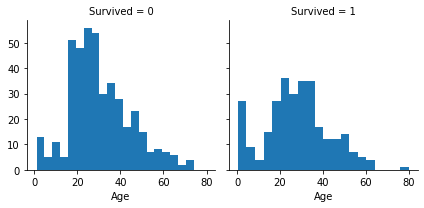

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age', bins=20)

We can observe that infants had a high survival rate. A large numbr of people in the age of 15-25 did not survive. Most passengers are in the range of 15-35. Based on the above observations, we can conclude that we should consider Age in our model as an important parameter and treat the null values present.

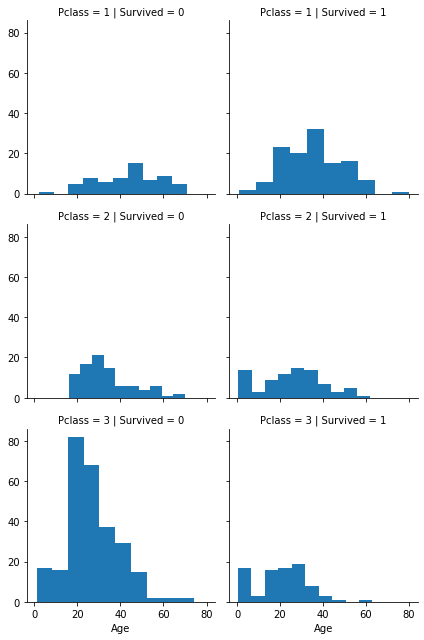

In [13]:
grid = sns.FacetGrid(train_df,col='Survived', row='Pclass')
grid.map(plt.hist,'Age')

From the above plots we can conclude:
- Pclass=3 had most passengers, however most of them did not survive.
- Infant passengers in Pclass 2 and 3 mostly survived 
- Most passengers in Pclass 1 survived 
- Pclass should be taken into account for modelling 

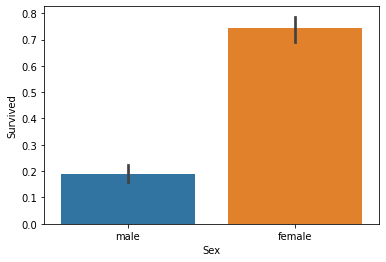

In [14]:
# Sex feature 
sns.barplot(x='Sex', y='Survived', data=train_df)

Most of the passengers who survived were female



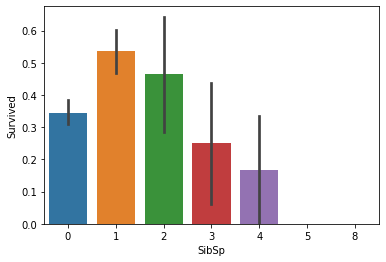

In [15]:
#SibSp 

sns.barplot(x='SibSp', y='Survived', data=train_df)

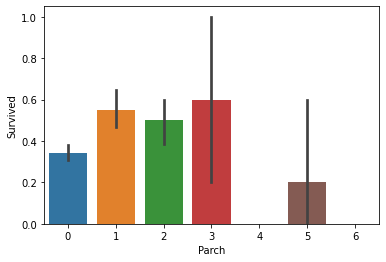

In [16]:
# Parch
sns.barplot(x="Parch", y="Survived", data=train_df)


### Data Wrangling

Let us start by dropping the unncessary features. Based on the analysis, the 
Cabin and Ticket features can be dropped.

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df = train_df.drop(['Cabin','Ticket'], axis=1)
test_df = test_df.drop(['Cabin','Ticket'], axis=1)
combine = [train_df, test_df]


In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Creating new feature Title from the Name feature using Regular Expressions to look for the first word that ends with a dot character.

In [20]:
for dataset in combine:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
pd.crosstab(train_df.Title, train_df.Survived)

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


We can replace many of the titles in the dataset to a more generic title called 
"Other"

In [22]:
for dataset in combine :
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt','Col', 'Don', 'Dr', 'Major','Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Miss')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.347826


In [0]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Other':5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)




In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [25]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,1


We can now safely drop the Name and PassengerId features from the training set and the Name feature only from the testing set

In [0]:
train_df = train_df.drop(['Name', 'PassengerId'] ,axis=1)
test_df = test_df.drop('Name', axis=1)
combine = [train_df, test_df]

In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [28]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


### Embarked Feature

In [29]:
train_df['Embarked'].isnull().sum()

2

In [30]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
len(train_df[train_df['Embarked'] == 'S'])

644

In [32]:
len(train_df[train_df['Embarked'] == 'Q'])


77

In [33]:
len(train_df[train_df['Embarked'] == 'C'])


168

We see that majority of the passengers have embarked in Southampton(S). So, we can fill the null values with 'S'

In [0]:
train_df = train_df.fillna({'Embarked':'S'})

In [35]:
train_df['Embarked'].isnull().sum()

0

In [36]:
test_df['Embarked'].isnull().sum()

0

### Age Feature

In [0]:
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels = labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels = labels)

In [38]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,1,Student
1,1,1,female,38.0,1,0,71.2833,C,3,Adult
2,1,3,female,26.0,0,0,7.9250,S,2,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,3,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5,Young Adult
887,1,1,female,19.0,0,0,30.0000,S,2,Student
888,0,3,female,-0.5,1,2,23.4500,S,2,Unknown
889,1,1,male,26.0,0,0,30.0000,C,1,Young Adult


In [0]:
# fill missing age with mode age group for each title
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]
        
for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]

In [40]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,1,Student
1,1,1,female,38.0,1,0,71.2833,C,3,Adult
2,1,3,female,26.0,0,0,7.9250,S,2,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,3,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,5,Young Adult
887,1,1,female,19.0,0,0,30.0000,S,2,Student
888,0,3,female,-0.5,1,2,23.4500,S,2,Student
889,1,1,male,26.0,0,0,30.0000,C,1,Young Adult


This way we have filled the missing values in the AgeGroup column somewhat accurately

In [41]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare            True
Embarked       False
Title          False
AgeGroup       False
dtype: bool

In [0]:
test_df.Fare.fillna(test_df['Fare'].mode()[0], inplace=True)

In [43]:
test_df.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Title          False
AgeGroup       False
dtype: bool

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,1,Student
1,1,1,female,38.0,1,0,71.2833,C,3,Adult
2,1,3,female,26.0,0,0,7.9250,S,2,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,3,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,1,Young Adult


In [0]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

# train.head()

#dropping the Age feature for now, might change
train_df = train_df.drop(['Age'], axis = 1)
test_df = test_df.drop(['Age'], axis = 1)

In [46]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,male,1,0,7.2500,S,1,4.0
1,1,1,female,1,0,71.2833,C,3,6.0
2,1,3,female,0,0,7.9250,S,2,5.0
3,1,1,female,1,0,53.1000,S,3,5.0
4,0,3,male,0,0,8.0500,S,1,5.0


In [47]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_df['Sex'] = train_df['Sex'].map(sex_mapping)
test_df['Sex'] = test_df['Sex'].map(sex_mapping)

train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,S,1,4.0
1,1,1,1,1,0,71.2833,C,3,6.0
2,1,3,1,0,0,7.9250,S,2,5.0
3,1,1,1,1,0,53.1000,S,3,5.0
4,0,3,0,0,0,8.0500,S,1,5.0


In [48]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,1,0,7.2500,1,1,4.0
1,1,1,1,1,0,71.2833,2,3,6.0
2,1,3,1,0,0,7.9250,1,2,5.0
3,1,1,1,1,0,53.1000,1,3,5.0
4,0,3,0,0,0,8.0500,1,1,5.0


### Splitting the data into training and test sets 

In [0]:
order = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'AgeGroup', 'Survived']
train_df = train_df[order]

In [50]:
train_df.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeGroup,Survived
0,3,0,1,0,7.2500,1,1,4.0,0
1,1,1,1,0,71.2833,2,3,6.0,1
2,3,1,0,0,7.9250,1,2,5.0,1
3,1,1,1,0,53.1000,1,3,5.0,1
4,3,0,0,0,8.0500,1,1,5.0,0


In [0]:
X = train_df.iloc[:,:-1].values
y = train_df.iloc[:,8].values


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [0]:
### Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_y_pred = log_classifier.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_y_pred)
cm

array([[111,  28],
       [ 22,  62]])

In [57]:
log_reg_score = log_classifier.score(X_train, y_train)*100
log_reg_score

82.93413173652695

### K-Nearest Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knn_y_pred = knn_classifier.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, knn_y_pred)
cm

array([[120,  19],
       [ 20,  64]])

In [61]:
knn_score = knn_classifier.score(X_train, y_train)*100
knn_score

86.07784431137725

### SVM Classifier

In [62]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='poly', random_state=0)
svm_classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
svm_y_pred = svm_classifier.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, svm_y_pred)
cm

array([[127,  12],
       [ 24,  60]])

In [65]:
svm_score = svm_classifier.score(X_train, y_train)*100
svm_score

84.88023952095809

### Kernel SVM 

In [66]:
from sklearn.svm import SVC
ksvm_classifier = SVC(kernel='rbf', random_state=0)
ksvm_classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
ksvm_y_pred = ksvm_classifier.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, ksvm_y_pred)
cm

array([[123,  16],
       [ 22,  62]])

In [69]:
ksvm_score = ksvm_classifier.score(X_train, y_train) * 100
ksvm_score

84.58083832335329

### Naive Bayes 

In [70]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
nb_y_pred = nb_classifier.predict(X_test)

In [72]:
cm = confusion_matrix(y_test, nb_y_pred)
cm

array([[108,  31],
       [ 19,  65]])

In [73]:
nb_score = nb_classifier.score(X_train, y_train)*100
nb_score

81.88622754491018

### Decision Tree Classification


In [74]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
dt_y_pred = dt_classifier.predict(X_test)

In [76]:
cm = confusion_matrix(y_test, dt_y_pred)
cm

array([[118,  21],
       [ 21,  63]])

In [77]:
dt_score = dt_classifier.score(X_test, y_test)*100
dt_score

81.16591928251121

### Random Forest Classification

In [78]:
from sklearn.ensemble import RandomForestClassifier

rfc_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc_classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rfc_y_pred = rfc_classifier.predict(X_test)

In [80]:
cm = confusion_matrix(y_test, rfc_y_pred)
cm

array([[120,  19],
       [ 22,  62]])

In [81]:
rfc_score = rfc_classifier.score(X_test, y_test) * 100
rfc_score

81.61434977578476